# EDA ON LENDING CLUB CASE STUDY  

### Developer

*Parakh Agarwal*




## Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: <br>

    1)If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

    2)If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 
The dataset given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

    1)Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

         a) Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

         b) Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

         c)Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

    2)Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

The EDA is performed here in 4 Steps :

        1) Data Cleansing
        2) Data Standardization 
        3) Univariate analysis
        4) Bivariate analysis

# Data Cleansing

In [1]:
# Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
# Reading csv and assigning it to lending_df
lending_df= pd.read_csv("D:\\upgrad_dataset\loan.csv",low_memory=False)

In [3]:
# Printing the shape i.e no of rows and columns of the lending_df
lending_df.shape

(39717, 111)

In [4]:
# Priting starting 10 rows
lending_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Printing all the column with no of not null values
lending_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [6]:
# Showing different variables for numerical columns
lending_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
#Printing the sum of all columns having null or empty values
lending_df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


The first step will be to get the column list which has more than 40 % null values that can be dropped

In [8]:
# Method to get the columns to be dropped which has null or emty values more than 40 percent
def getColumnsToBeDropped(df):
    columnlist=[]
    for i in df.columns:
        if(((df[i].isna().sum()/df.shape[0])*100) > 40):
            columnlist.append(i)
    print(columnlist)
    return columnlist

In [9]:
#Dropping the columns
columnsTobeDropped=getColumnsToBeDropped(lending_df)
lending_df_drop_na = lending_df.drop(columns=columnsTobeDropped)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

In [10]:
# Printing the shapeof new DF
lending_df_drop_na.shape

(39717, 54)

We can see that out of 111 columns 54 columns are left , the remaining columns have been dropped since they had large amount of null values and could not be used in analysis.
Now we have to see if there are further columns that can be dropped

In [11]:
lending_df_drop_na.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


We can see now that there are 2 id columns. Let us check the uniqueness of all the columns.The idea behind this is to remove columns which has only a single value or all the unique values.

In [12]:
# Getting no of unique values of each columns
lending_df_drop_na.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

Now we can see here that there are 3 columns whose values are unique hence they can be dropped

In [13]:
lending_df_cleaned_na_and_unique=lending_df_drop_na.drop(['id','member_id','url'],axis=1)

Now let us see the unique values of all columns

In [14]:
# Printing the unique values of each column
for i in lending_df_cleaned_na_and_unique.columns:
    print(i+' '+str(lending_df_cleaned_na_and_unique[i].unique()))
    print('\n')

loan_amnt [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050 16100
 10525 19775 14500 11700  4150 12375  1700 22250 11200 22500 15900  3150
 18550  8575  7700 24500 22200 21400  940

pymnt_plan ['n']


desc ['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>'
 nan ...
 'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.'
 'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing to pay the

open_acc [ 3  2 10 15  9  7  4 11 14 12 20  8  6 17  5 13 16 30 21 18 19 27 23 34
 25 22 24 26 32 28 29 33 31 39 35 36 38 44 41 42]


pub_rec [0 1 2 3 4]


revol_bal [13648  1687  2956 ... 27185 66033 85607]


revol_util ['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


total_acc [ 9  4 10 37 38 12 11 13  3 23 34 29 28 42 14 22 21 17  7 31 44 26 16  6
 18 27 24 25 40 35  8 20 15 19 36 51 32 30 33 46  5 61 56 50 41 39 79 62
 43 47 53 45 60 55 52 58 54 57 49 63 48 59 77 87 75 72 64 67 78 76 74 66
 81 90 80 71 69 73 70 68 65  2]


initial_list_status ['f']


out_prncp [   0.    524.06 1849.1  ...   19.12   13.28   79.24]


out_prncp_inv [   0.    524.06 1844.43 ...   19.09   13.28   79.24]


total_pymnt [5863.155187 1008.71     3005.666844 ... 5272.161128 5174.198551
 9195.263334]


total_pymnt_inv [5833.84 1008.71 3005.67 ... 1397.12  672.66  980.83]


total_rec_prncp [ 5000.     456.46  2400.   ...  2886.21   544.02 16077.42]


total_rec_int [ 863.16  435.17  605.67 ... 1413.49

There are columns which have only 0. and nan values and hence can be removed and also columns which has only 1 unique value and hence can be dropped

In [15]:
lending_df_cleaned_columns=lending_df_cleaned_na_and_unique.drop(['collections_12_mths_ex_med' , 'acc_now_delinq' ,'policy_code','application_type','delinq_amnt','tax_liens','chargeoff_within_12_mths'],axis=1)

In [16]:
lending_df_cleaned_columns.shape

(39717, 44)

In [17]:
lending_df_cleaned_columns.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Now we can check if there are rows which can be delete. One type of rows are whose **loan_status** is **Current** and therefore cannot be determined if the borrower is defaulter or not. 

In [18]:
lending_df_cleaned_rows=lending_df_cleaned_columns[lending_df_cleaned_columns['loan_status']!='Current']

Now less see how many rows are left

In [19]:
lending_df_cleaned_rows.shape

(38577, 44)

# Data Standardization 

In [20]:
lending_df_cleaned_rows.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,...,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,...,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0
10,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,...,7678.02,6500.00,1178.02,0.00,0.00,0.00,Jun-13,1655.54,Dec-15,0.0


We can see that int_rate has % suffix on it and it is a numericalvariable .Appending suffix % makes it a an object variable , we  can remove the suffix and create a new column **int_rate_percent** it so that it can easily be used for further analysis.


In [21]:
# Adding int_rate_percent column and dropping int_rate columns
lending_df_cleaned_rows.loc[:,'int_rate_percent'] = lending_df_cleaned_rows['int_rate'].apply(lambda x : str(x)[0:-2])
lending_df_cleaned_drpped_percent=lending_df_cleaned_rows.drop(['int_rate'],axis=1)

D:\New folder\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\New folder\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
lending_df_cleaned_drpped_percent.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_percent
0,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,10.6
1,2500,2500,2500.0,60 months,59.83,C,C4,Ryder,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,15.2
2,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,15.9
3,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,13.4
5,5000,5000,5000.0,36 months,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,7.9


In [23]:
#Checking the datatype of int_rate_percent column
lending_df_cleaned_drpped_percent.int_rate_percent.dtypes

dtype('O')

Let us convert the int_rate_percent data type to numeric

In [24]:
lending_df_cleaned_drpped_percent['int_rate_percent']=pd.to_numeric(lending_df_cleaned_drpped_percent.int_rate_percent)

In [25]:
lending_df_cleaned_drpped_percent.int_rate_percent.dtypes

dtype('float64')

Now let us devrive the year and month at which the loan was issued and name the column names as issue_year and issue_month

In [26]:
lending_df_cleaned_drpped_percent['issue_year']=lending_df_cleaned_drpped_percent['issue_d'].apply(lambda x : datetime.strptime(x,'%b-%y')).dt.year
lending_df_cleaned_drpped_percent['issue_month']=lending_df_cleaned_drpped_percent['issue_d'].apply(lambda x : datetime.strptime(x,'%b-%y')).dt.month
lending_df_cleaned_drpped_percent.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_percent,issue_year,issue_month
0,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,RENT,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,10.6,2011,12
1,2500,2500,2500.0,60 months,59.83,C,C4,Ryder,< 1 year,RENT,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,15.2,2011,12
2,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,RENT,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,15.9,2011,12
3,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,13.4,2011,12
5,5000,5000,5000.0,36 months,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,7.9,2011,12


In [27]:
lending_df_cleaned_final=lending_df_cleaned_drpped_percent

In [28]:
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 32
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Univariate  Analysis . 
### Variable : term
First we wll see how many distict values it has

In [29]:
lending_df_cleaned_final.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

Let us see wha percetage of borrowers are defaulters

In [30]:
(lending_df_cleaned_final[lending_df_cleaned_final['loan_status']=='Charged Off'].loan_status.count()/lending_df_cleaned_final.loan_status.count())*100

14.586411592399617

We can see of out of overall only 14.59 percentage of people i.e. 1 out of every 7 people have  defaulted and this can be our consideration for further analysis.

We can see here that the loan is given here for 2 different time periodsi.e 36 months adnd 60 months. 
Now let us plot a count plot to see the distribution

Text(0, 0.5, 'No of loans')

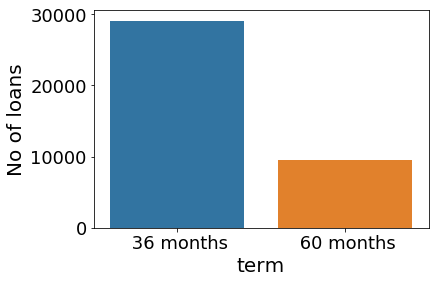

In [31]:
# Plotting the count plot
sns.countplot(x='term',data=lending_df_cleaned_final)
plt.ylabel('No of loans')

Here we can see no of  loan is given to borrowers for 36 months is greater than of 60 months by distance.
Now let us see the distubution of loan term and loan status of each loan term that has defaulters and non-defaulters.

Text(0, 0.5, 'No of loans')

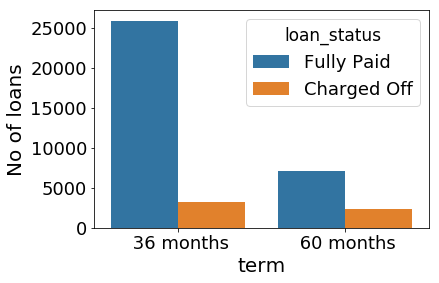

In [32]:
sns.countplot(x='term',hue='loan_status',data=lending_df_cleaned_final)
plt.ylabel('No of loans')

**Observation** : So from here we can see here that the percentage of people who has loan period of 60 months and are defaulters is greater than of 36 months and hence borrowers are more likely to default if they have term of 60 months compared to 36 months

*Now let us see the percentage of each loan tern that has defaulters and non-defaulters*

In [33]:
dfgriupbedbytermandloanstatus=lending_df_cleaned_final.groupby(by=['term','loan_status'])['loan_amnt'].count().reset_index()

In [34]:
dfgriupbedbytermandloanstatus['perc']=100*dfgriupbedbytermandloanstatus['loan_amnt']/dfgriupbedbytermandloanstatus.groupby(['term'])['loan_amnt'].transform('sum')
df_term=dfgriupbedbytermandloanstatus[dfgriupbedbytermandloanstatus['loan_status']=='Charged Off'].drop(['loan_amnt'],axis=1)

Text(0, 0.5, '% of Charged Off loans')

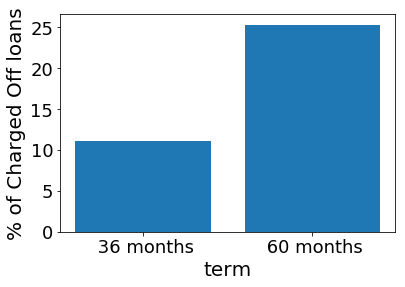

In [35]:
plt.bar('term','perc',data=df_term)
plt.xlabel("term")
plt.ylabel("% of Charged Off loans")

**Observation** : From here we can see that the percentage of charged off load incraeses to 25 percent in case of 60 months. Hence people with high term period are more likely to be defaulters


**Variable : purpose** <br>
A category provided by the borrower for the loan request.

In [36]:
lending_df_cleaned_final.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

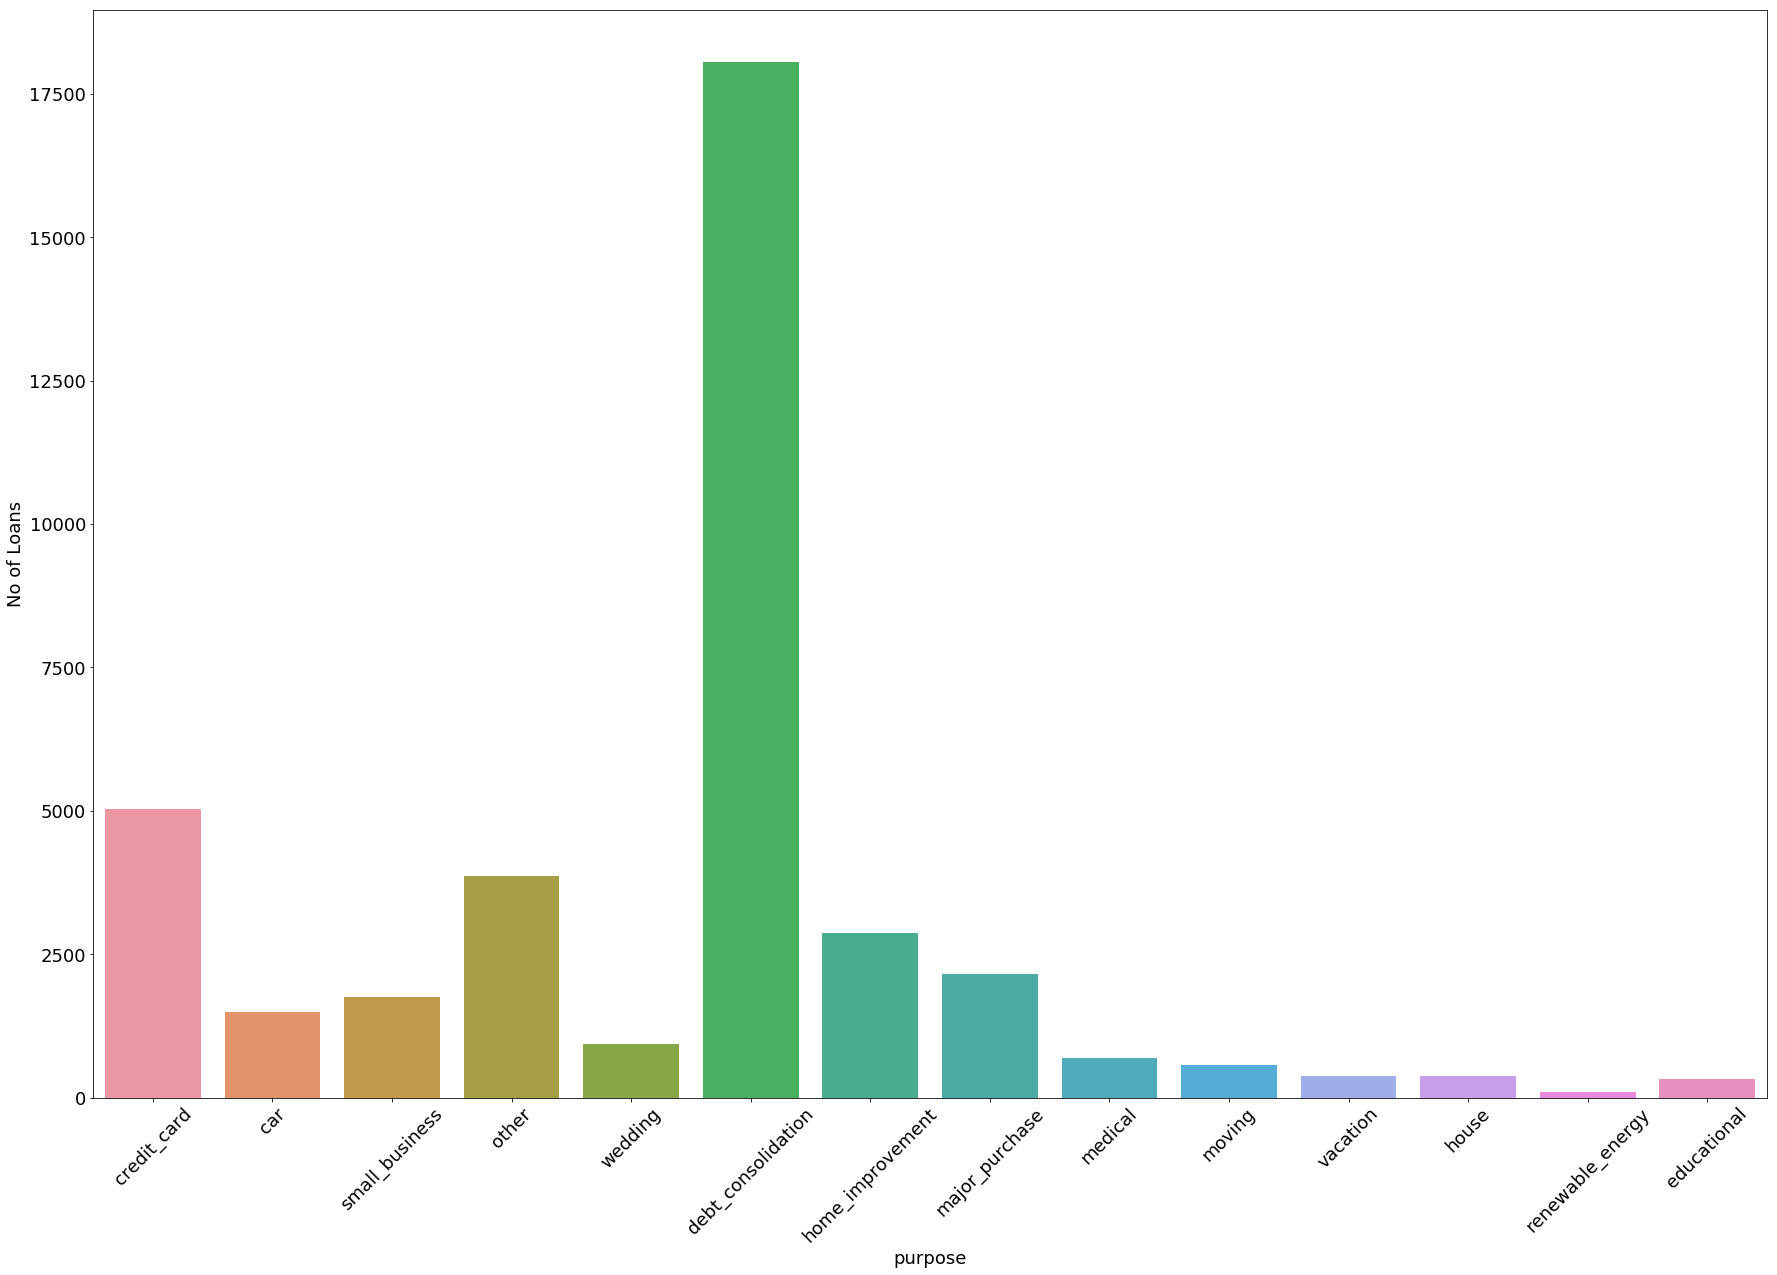

In [37]:
plt.figure(figsize=(30,20))
chart=sns.countplot(x='purpose',data=lending_df_cleaned_final)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize=18)
plt.xlabel('purpose',fontsize=18)
plt.ylabel('No of Loans',fontsize=18)
chart.tick_params(labelsize=18)

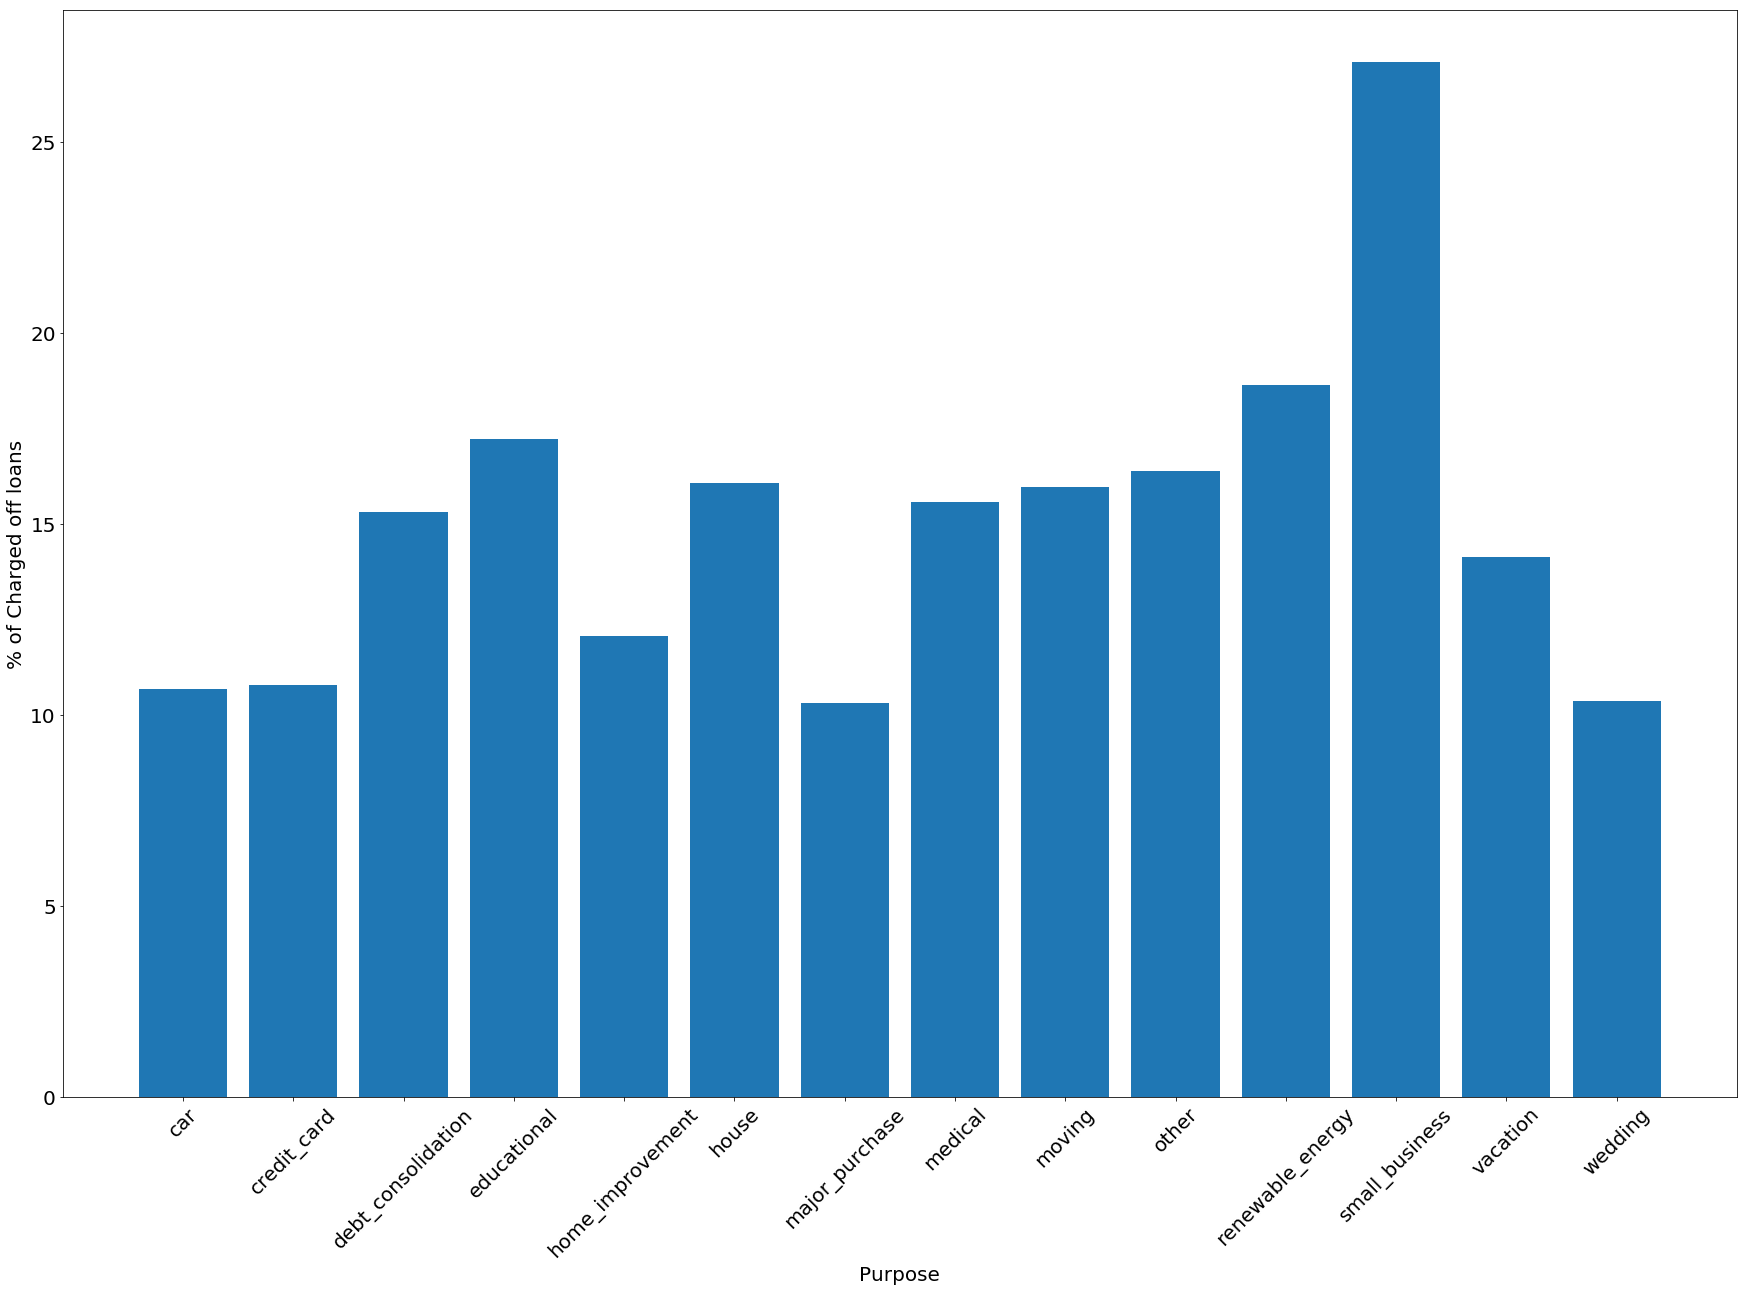

In [38]:
lending_df_emp_purpose=lending_df_cleaned_final.groupby(['purpose','loan_status']).count().reset_index()
lending_df_emp_purpose['percent']=100*lending_df_emp_purpose['loan_amnt']/lending_df_emp_purpose.groupby('purpose')['loan_amnt'].transform('sum')
lending_df_emp_purpose=lending_df_emp_purpose[lending_df_emp_purpose['loan_status']=='Charged Off']

plt.figure(figsize=(30,20))
plt.bar(lending_df_emp_purpose['purpose'],lending_df_emp_purpose['percent'])
plt.xlabel("Purpose", fontsize=20)
plt.ylabel("% of Charged off loans" ,fontsize=20)
plt.tick_params(axis='x', labelrotation = 45,labelsize=20)
plt.tick_params(axis='y', labelrotation = 0,labelsize=20)


**Observartions** : 1) Out of all other pupooses the maximum no of loans was given for deb consilidation which is way ahead by the 2nd pupose of credit card <br>
2) The maximum no of charged off loans is for small business with around 26 percent which is far above any other pupose. So loans if given to small business are very risky

**Variable: issue_d**
The month which the loan was funded.

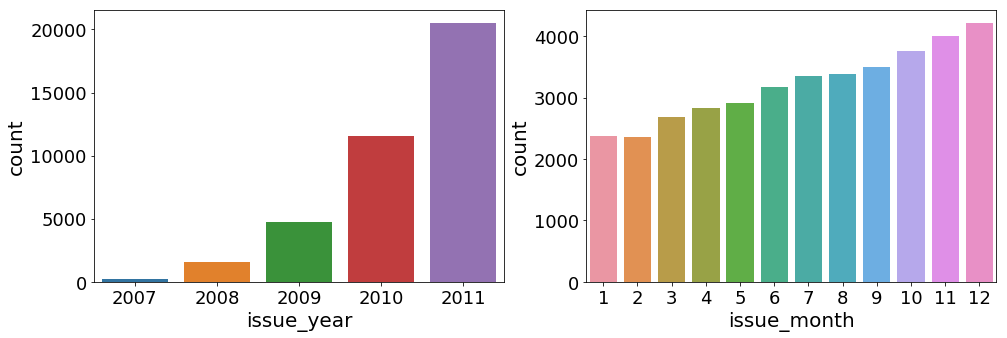

In [39]:

plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1)
sns.countplot(lending_df_cleaned_final['issue_year'], order=sorted(lending_df_cleaned_final.issue_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(lending_df_cleaned_final['issue_month'], order=sorted(lending_df_cleaned_final.issue_month.unique()))

**Observation**:

1) Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.<br>
2) Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year?

**Variable : loan_amnt**
let us first see the variables metrics of variable loan_amnt

In [40]:
lending_df_cleaned_final.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

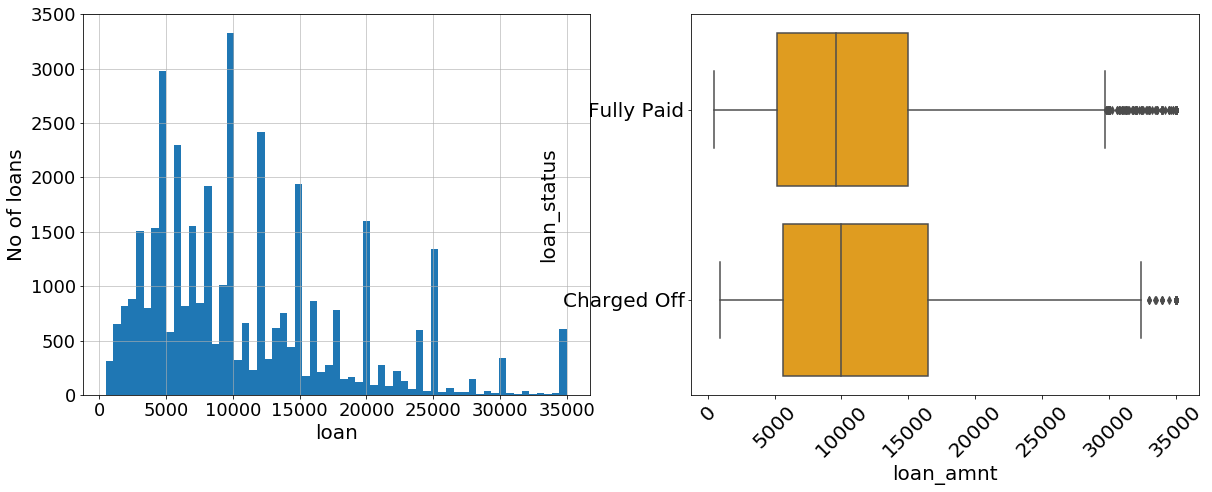

In [41]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(lending_df_cleaned_final.loan_amnt,bins='auto')
plt.xlabel('loan')
plt.ylabel('No of loans')
plt.grid(axis='x',alpha=0.75)
plt.grid(axis='y',alpha=0.75)

plt.subplot(1,2,2)
sns.boxplot(x=lending_df_cleaned_final.loan_amnt,y=lending_df_cleaned_final.loan_status,color='orange')
plt.tick_params(axis='x', labelrotation = 45,labelsize=20)
plt.tick_params(axis='y', labelrotation = 0,labelsize=20)

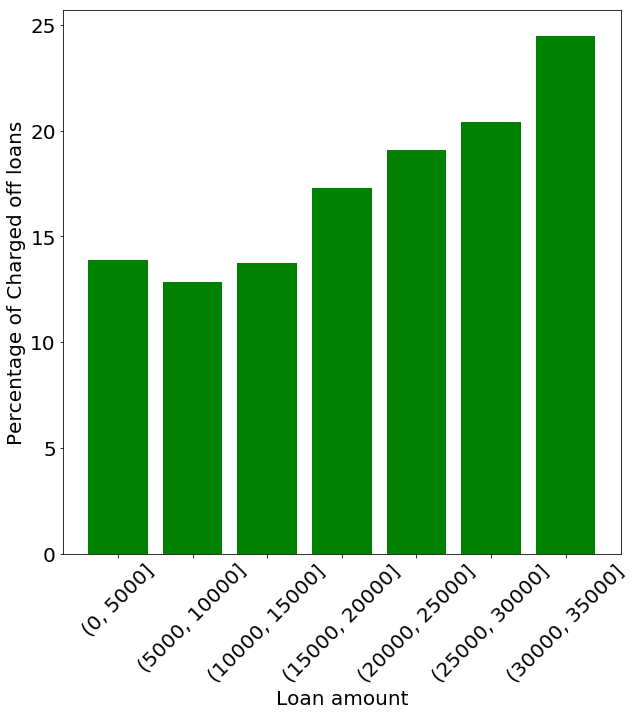

In [42]:
plt.figure(figsize=(10,10))
lending_df_cleaned_final['loan_amnt_bins']=pd.cut(lending_df_cleaned_final['loan_amnt'],bins=[0,5000,10000,15000,20000,25000,30000,35000])
df_amnt_bins=lending_df_cleaned_final.groupby(by=['loan_amnt_bins','loan_status']).count()
df_amnt_bins['perc']=100*df_amnt_bins['loan_amnt']/df_amnt_bins.groupby('loan_amnt_bins')['loan_amnt'].transform('sum')
df_amnt_bins=df_amnt_bins.reset_index()
df_amnt_bins['loan_amnt_bins']= df_amnt_bins['loan_amnt_bins'].apply(lambda x : str(x))
df_amnt_bins=df_amnt_bins[df_amnt_bins['loan_status']=='Charged Off']
plt.bar('loan_amnt_bins','perc',data=df_amnt_bins, color="green")
plt.xlabel('Loan amount')
plt.ylabel("Percentage of Charged off loans")
plt.tick_params(axis='x', labelrotation = 45,labelsize=20)
plt.tick_params(axis='y', labelrotation = 0,labelsize=20)


**Observation** : 1) 75 percent ofthe loan amount is less than 15000. <br>
                  2) Very few of the loans are more than 30000. <br>
                  3) Most of the loans are of 10000. <br>
                  4) Noof loans are increasing till 10000 and decreases till 35000 hence most of the loans are of 10000 <br>
                  5) There are spikes in the dsitribution of loan_amount which are in multiple of 5000i.e maximum loans are given which are in multiples of 5000 <br>
                  6) The mean of all the loans is 11047 and the highest no of loan is for 10000 hence most loans are given in bucket of 10k to 15k <br>
                  7) The percentage of charhed off loans increases as we increase the loan amount excepts for the 0-5000 bin hence hiher loan amount may lead to higher no of loans being *defaulted* <br>
                    

In [43]:
lending_df_cleaned_final.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Variable : Interest rate


In [44]:
lending_df_cleaned_final.int_rate_percent.describe()

count    38577.000000
mean        11.879265
std          3.689708
min          5.400000
25%          8.900000
50%         11.700000
75%         14.300000
max         24.400000
Name: int_rate_percent, dtype: float64

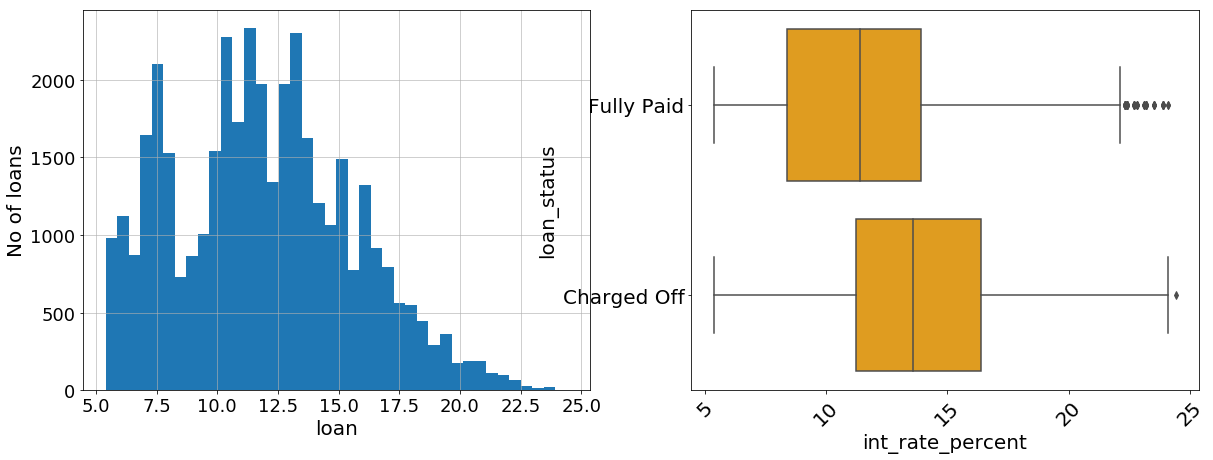

In [45]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(lending_df_cleaned_final.int_rate_percent,bins=40)
plt.xlabel('loan')
plt.ylabel('No of loans')
plt.grid(axis='x',alpha=0.75)
plt.grid(axis='y',alpha=0.75)
plt.subplot(1,2,2)
sns.boxplot(x=lending_df_cleaned_final.int_rate_percent,y=lending_df_cleaned_final.loan_status,color='orange')
plt.tick_params(axis='x', labelrotation = 45,labelsize=20)
plt.tick_params(axis='y', labelrotation = 0,labelsize=20)

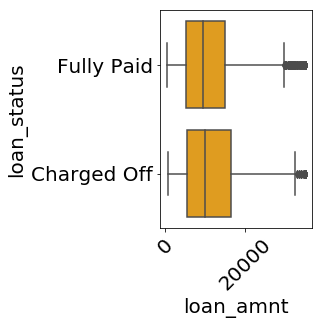

In [46]:
plt.subplot(1,2,2)
sns.boxplot(x=lending_df_cleaned_final.loan_amnt,y=lending_df_cleaned_final.loan_status,color='orange')
plt.tick_params(axis='x', labelrotation = 45,labelsize=20)
plt.tick_params(axis='y', labelrotation = 0,labelsize=20)

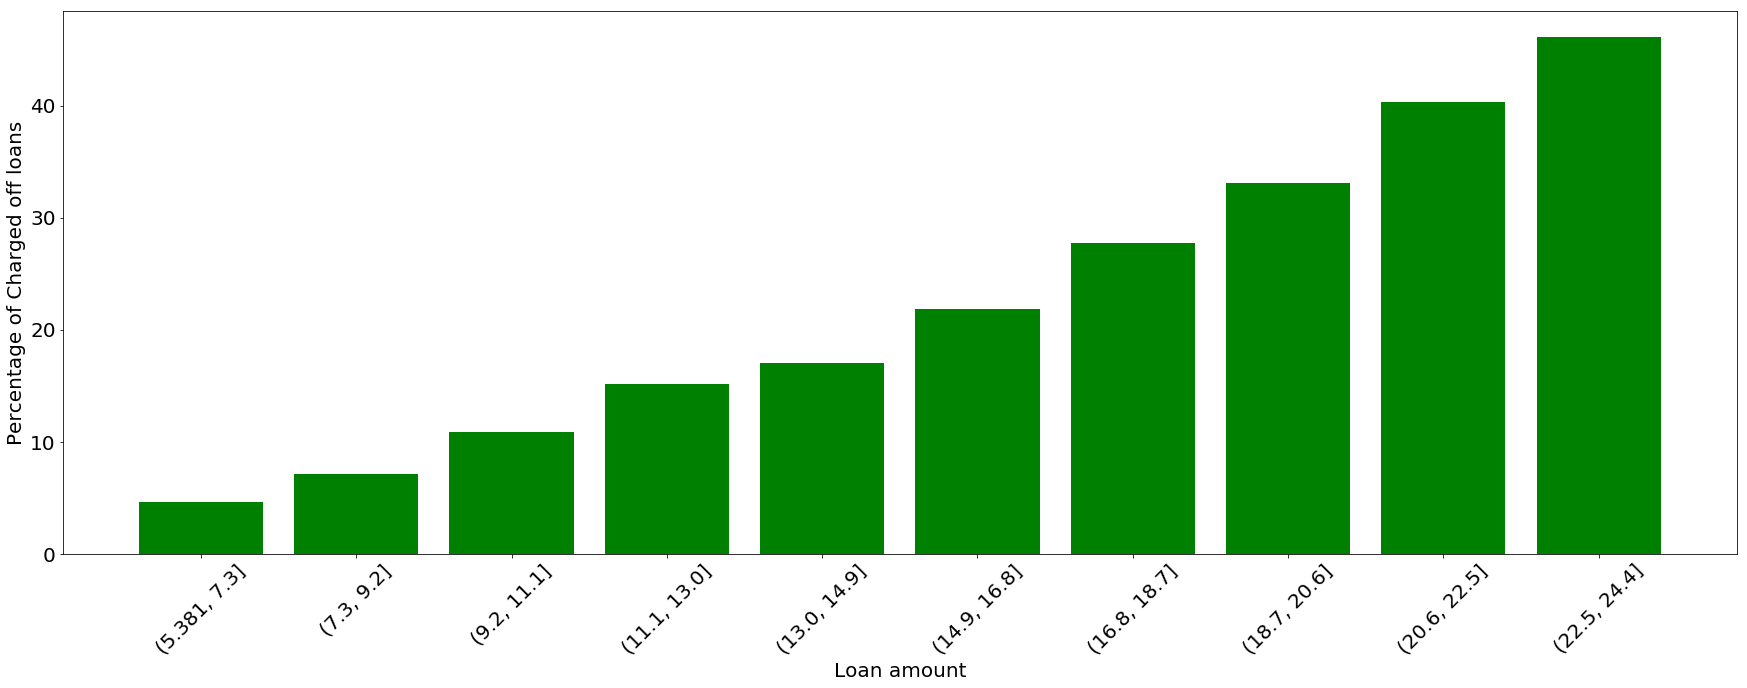

In [47]:
plt.figure(figsize=(30,10))
lending_df_cleaned_final['int_rate_bins']=pd.cut(lending_df_cleaned_final['int_rate_percent'],bins=10)
df_int_rate_bins=lending_df_cleaned_final.groupby(by=['int_rate_bins','loan_status']).count()
df_int_rate_bins['perc']=100*df_int_rate_bins['int_rate_percent']/df_int_rate_bins.groupby('int_rate_bins')['int_rate_percent'].transform('sum')
df_int_rate_bins=df_int_rate_bins.reset_index()
df_int_rate_bins['int_rate_bins']= df_int_rate_bins['int_rate_bins'].apply(lambda x : str(x))
df_int_rate_bins=df_int_rate_bins[df_int_rate_bins['loan_status']=='Charged Off']
plt.bar('int_rate_bins','perc',data=df_int_rate_bins, color="green")
plt.xlabel('Loan amount')
plt.ylabel("Percentage of Charged off loans")
plt.tick_params(axis='x', labelrotation = 45,labelsize=20)
plt.tick_params(axis='y', labelrotation = 0,labelsize=20)

**Observation** : 1) 75 percent ofthe loan amount is less than 14.3 % <br>
                  2) Very few of the loans are more than 21 %. <br>
                  3) Most of the loans are of 11 % and the average loan is also around 11 % . <br>
                  4) No of loans are increasing till 11 and decreases till 25% and decreases drmatically after 16 percent <br>
                  5) The percentage of charged off loans increases as we increase the loan percent hence higher loan leads to higher "defaulters" <br>

**Variable : annual_inc**

In [48]:
lending_df_cleaned_final.groupby('loan_status').annual_inc.describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,62427.298034,47776.014188,4080.0,37000.00,53000.0,75000.0,1250000.0
Fully Paid,32950.0,69862.503328,66562.246521,4000.0,41132.75,60000.0,84000.0,6000000.0


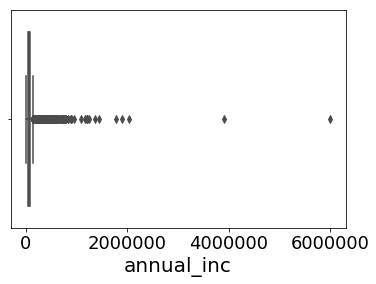

In [49]:
sns.boxplot(x=lending_df_cleaned_final.annual_inc,color='orange')

Here we can see that thare are few loan applications which are more than 110000 and can be removed.
After analysing the dataset and boxplot ,we can the outliers are above aroound 110000


122000.0
               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   5285.0  54575.905879  24118.914586  4080.0  36000.0  50400.0   
Fully Paid   30209.0  59257.820936  25151.826695  4000.0  40000.0  55200.0   

                 75%       max  
loan_status                     
Charged Off  70000.0  122000.0  
Fully Paid   75000.0  122000.0  


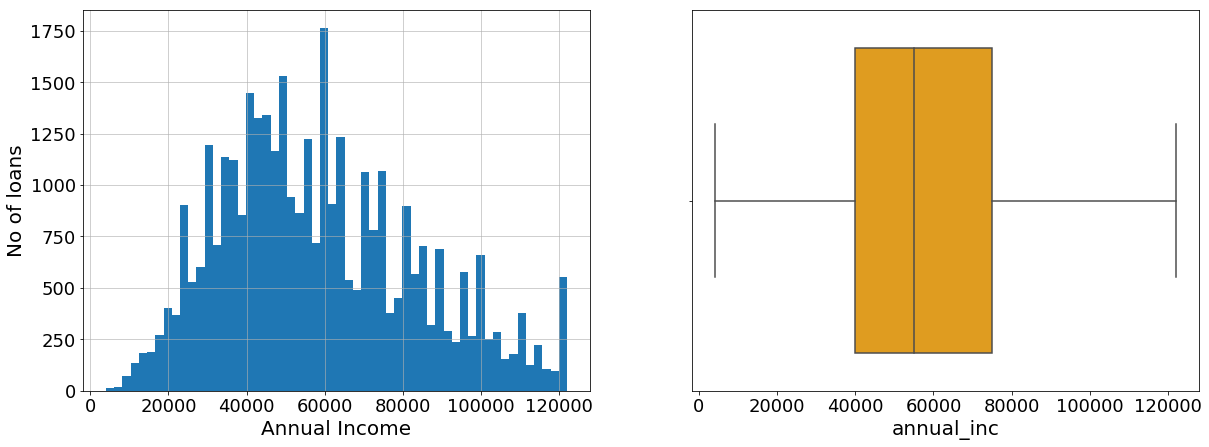

In [50]:
# After removing  outliers

print(lending_df_cleaned_final.annual_inc.quantile(0.92))

lending_df_cleaned__annual_inc=lending_df_cleaned_final[lending_df_cleaned_final['annual_inc']<=122000]

print(lending_df_cleaned__annual_inc.groupby('loan_status').annual_inc.describe())

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(lending_df_cleaned__annual_inc.annual_inc,bins='auto')
plt.xlabel('Annual Income')
plt.ylabel('No of loans')
plt.grid(axis='x',alpha=0.75)
plt.grid(axis='y',alpha=0.75)


plt.subplot(1,2,2)
sns.boxplot(x=lending_df_cleaned__annual_inc.annual_inc,color='orange')



# 

D:\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Percentage of Charged off loans')

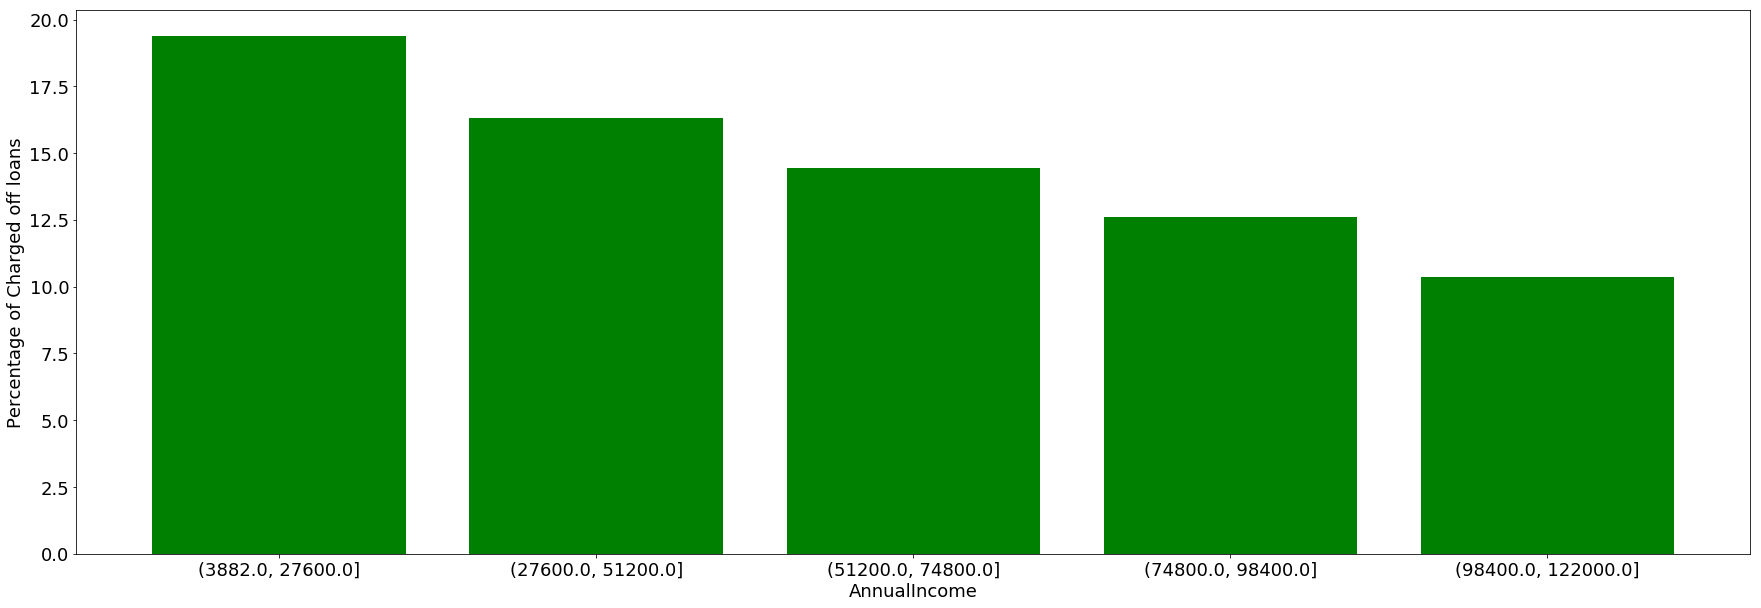

In [51]:
plt.figure(figsize=(30,10))


lending_df_cleaned__annual_inc['annual_inc_bins']=pd.cut(lending_df_cleaned__annual_inc['annual_inc'],bins=5)
#ser=100*lending_df_cleaned_final.groupby(['loan_amnt_bins','loan_status'])['loan_amnt'].count().rest_index()
lending_df_cleaned__annual_inc_bins=lending_df_cleaned__annual_inc.groupby(by=['annual_inc_bins','loan_status']).count()
lending_df_cleaned__annual_inc_bins['perc']=100*lending_df_cleaned__annual_inc_bins['annual_inc']/lending_df_cleaned__annual_inc_bins.groupby('annual_inc_bins')['annual_inc'].transform('sum')
#
lending_df_cleaned__annual_inc_bins=lending_df_cleaned__annual_inc_bins.reset_index()
lending_df_cleaned__annual_inc_bins['annual_inc_bins']= lending_df_cleaned__annual_inc_bins['annual_inc_bins'].apply(lambda x : str(x))
lending_df_cleaned__annual_inc_bins=lending_df_cleaned__annual_inc_bins[lending_df_cleaned__annual_inc_bins['loan_status']=='Charged Off']
plt.bar('annual_inc_bins','perc',data=lending_df_cleaned__annual_inc_bins, color="green")
plt.xlabel('AnnualIncome',fontsize=18)
plt.ylabel("Percentage of Charged off loans",fontsize=18)

**Observations** : 1) Most of the applications who has taken loan below the income around 122000 hence the people above those are rough 8% and can be considered as oulieers and s removed from the dataset <br>
2)The annual_inc at 60000 has the highest spike means that highest no of people have taken loan who has annual income of 60000. <br> 
3) The loan amount spikes at avery 20000 means most loans are taken in multiples of 20000. <br>
4)Percentage of charhed off loans decreases with increase in annual_inc and hence annual_inc can be a criteria for deciding whethere the application shouldbe given loan or not. <br>
5) Mean annual income of people with charged off loans is lower than that of full paid


**Variable**: emp_length

In [52]:
#Let us check the unique values
lending_df_cleaned_final.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

[Text(0, 0, '< 1 year'),
 Text(0, 0, '1 year'),
 Text(0, 0, '2 years'),
 Text(0, 0, '3 years'),
 Text(0, 0, '4 years'),
 Text(0, 0, '5 years'),
 Text(0, 0, '6 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '8 years'),
 Text(0, 0, '9 years'),
 Text(0, 0, '10+ years')]

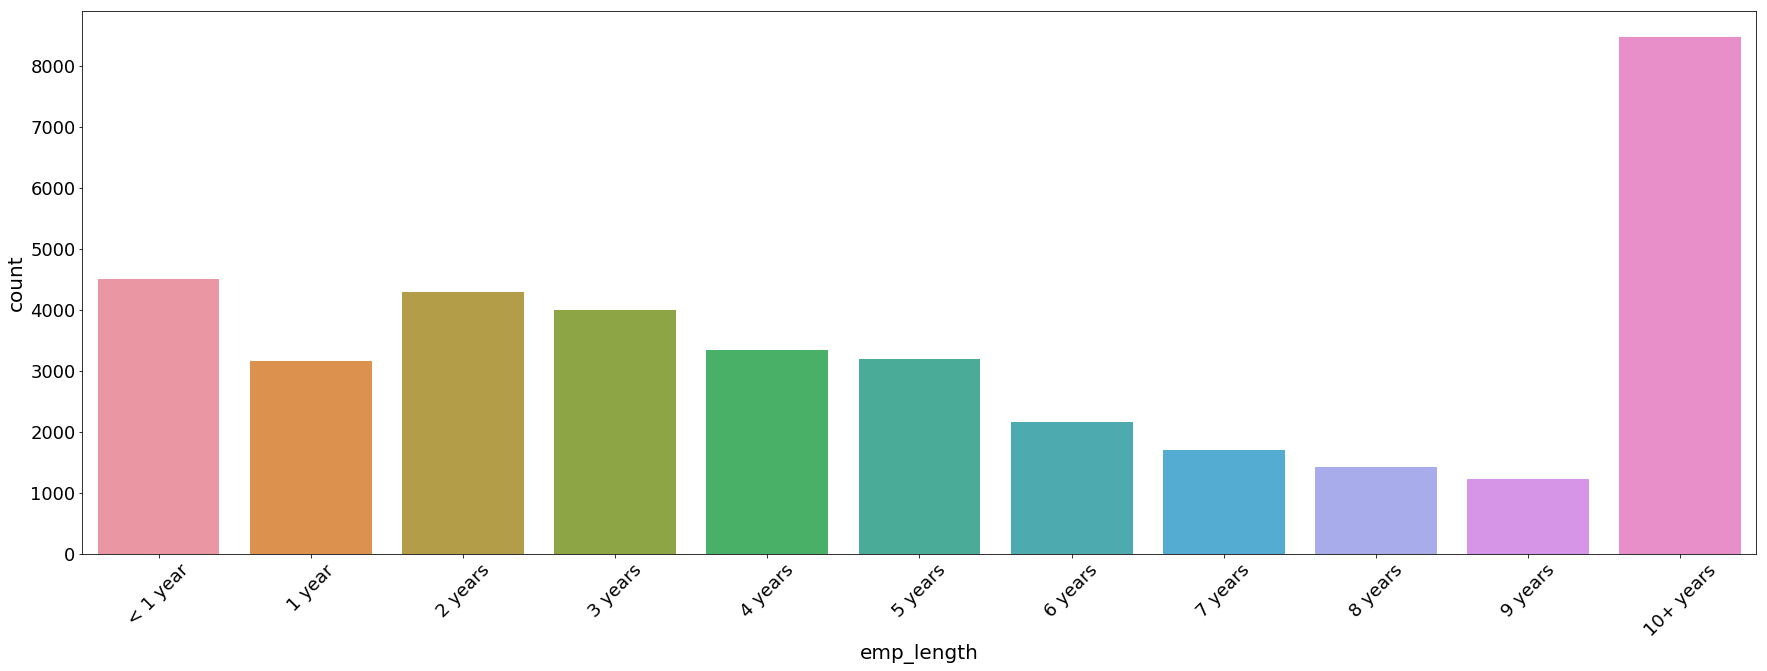

In [53]:
plt.figure(figsize=(30,10))
chart=sns.countplot(x='emp_length',data=lending_df_cleaned_final,order =['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

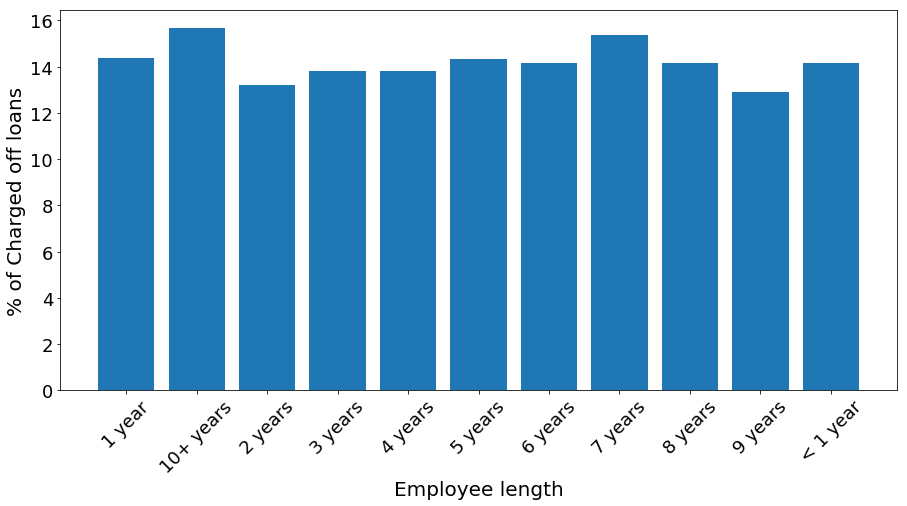

In [54]:
lending_df_emp_length=lending_df_cleaned_final.groupby(['emp_length','loan_status']).count().reset_index()
lending_df_emp_length['percent']=100*lending_df_emp_length['loan_amnt']/lending_df_emp_length.groupby('emp_length')['loan_amnt'].transform('sum')
lending_df_emp_length=lending_df_emp_length[lending_df_emp_length['loan_status']=='Charged Off']
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(lending_df_emp_length['emp_length'],lending_df_emp_length['percent'])
ax.set_xlabel("Employee length")
ax.set_ylabel("% of Charged off loans")
ax.tick_params(axis='x', labelrotation = 45)

**Observations** :1) Most loans are of employees which are of length >10 years. <br>
2) There isn't a significat difference in % of charged loans across employees of different lengths  

**Variable** : home_ownership <br>


In [55]:
lending_df_cleaned_final.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

[Text(0, 0, 'RENT'),
 Text(0, 0, 'OWN'),
 Text(0, 0, 'MORTGAGE'),
 Text(0, 0, 'OTHER'),
 Text(0, 0, 'NONE')]

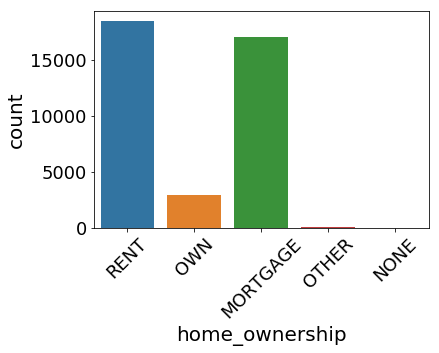

In [56]:
chart=sns.countplot(x='home_ownership',data=lending_df_cleaned_final)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

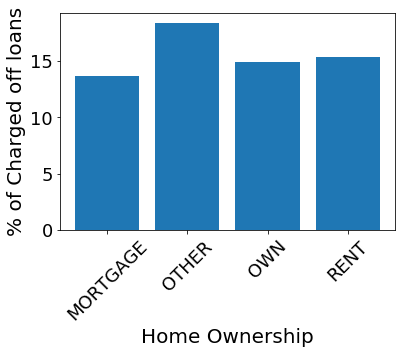

In [57]:
lending_df_emp_home=lending_df_cleaned_final.groupby(['home_ownership','loan_status']).count().reset_index()
lending_df_emp_home['percent']=100*lending_df_emp_home['loan_amnt']/lending_df_emp_home.groupby('home_ownership')['loan_amnt'].transform('sum')
lending_df_emp_home=lending_df_emp_home[lending_df_emp_home['loan_status']=='Charged Off']
fig, ax = plt.subplots()
ax.bar(lending_df_emp_home['home_ownership'],lending_df_emp_home['percent'])
ax.set_xlabel("Home Ownership")
ax.set_ylabel("% of Charged off loans")
ax.tick_params(axis='x', labelrotation = 45)

**Observations** : 1) Most of the loan borrowers have home either on rents or mortgage <br>
                    2) This isn't a significant different across different home ownerchip categories

**Variable** : Verfication_status <br>

In [58]:
lending_df_cleaned_final.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

[Text(0, 0, 'Verified'),
 Text(0, 0, 'Source Verified'),
 Text(0, 0, 'Not Verified')]

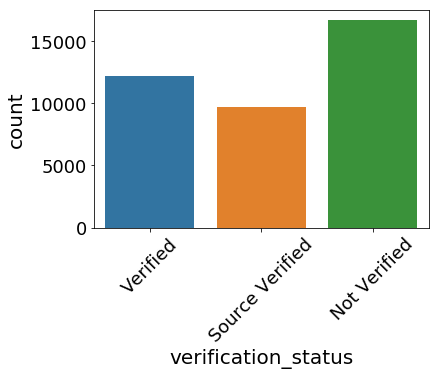

In [59]:
chart=sns.countplot(x='verification_status',data=lending_df_cleaned_final)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

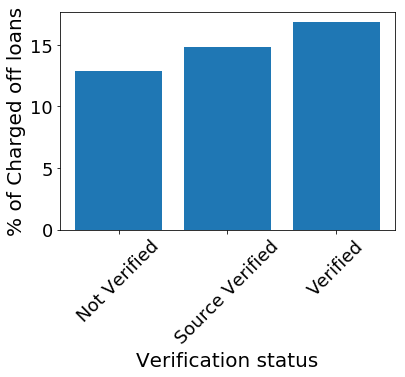

In [60]:
lending_df_emp_verify=lending_df_cleaned_final.groupby(['verification_status','loan_status']).count().reset_index()
#print(lending_df_emp_length.groupby('emp_length')['loan_amnt'].transform('sum'))
lending_df_emp_verify['percent']=100*lending_df_emp_verify['loan_amnt']/lending_df_emp_verify.groupby('verification_status')['loan_amnt'].transform('sum')
lending_df_emp_verify=lending_df_emp_verify[lending_df_emp_verify['loan_status']=='Charged Off']
fig, ax = plt.subplots()

ax.bar(lending_df_emp_verify['verification_status'],lending_df_emp_verify['percent'])
ax.set_xlabel("Verification status")
ax.set_ylabel("% of Charged off loans")

ax.tick_params(axis='x', labelrotation = 45)

Observations : 1) Most of the loan borrowers have their source not verified <br>
2) Borrowers which have been verfied amount to maximum no of charged of loans

**Variable** : addr_state
The state provided by the borrower in the loan application


In [61]:
lending_df_cleaned_final.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

[Text(0, 0, 'AZ'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'CA'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'WY'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'ME')]

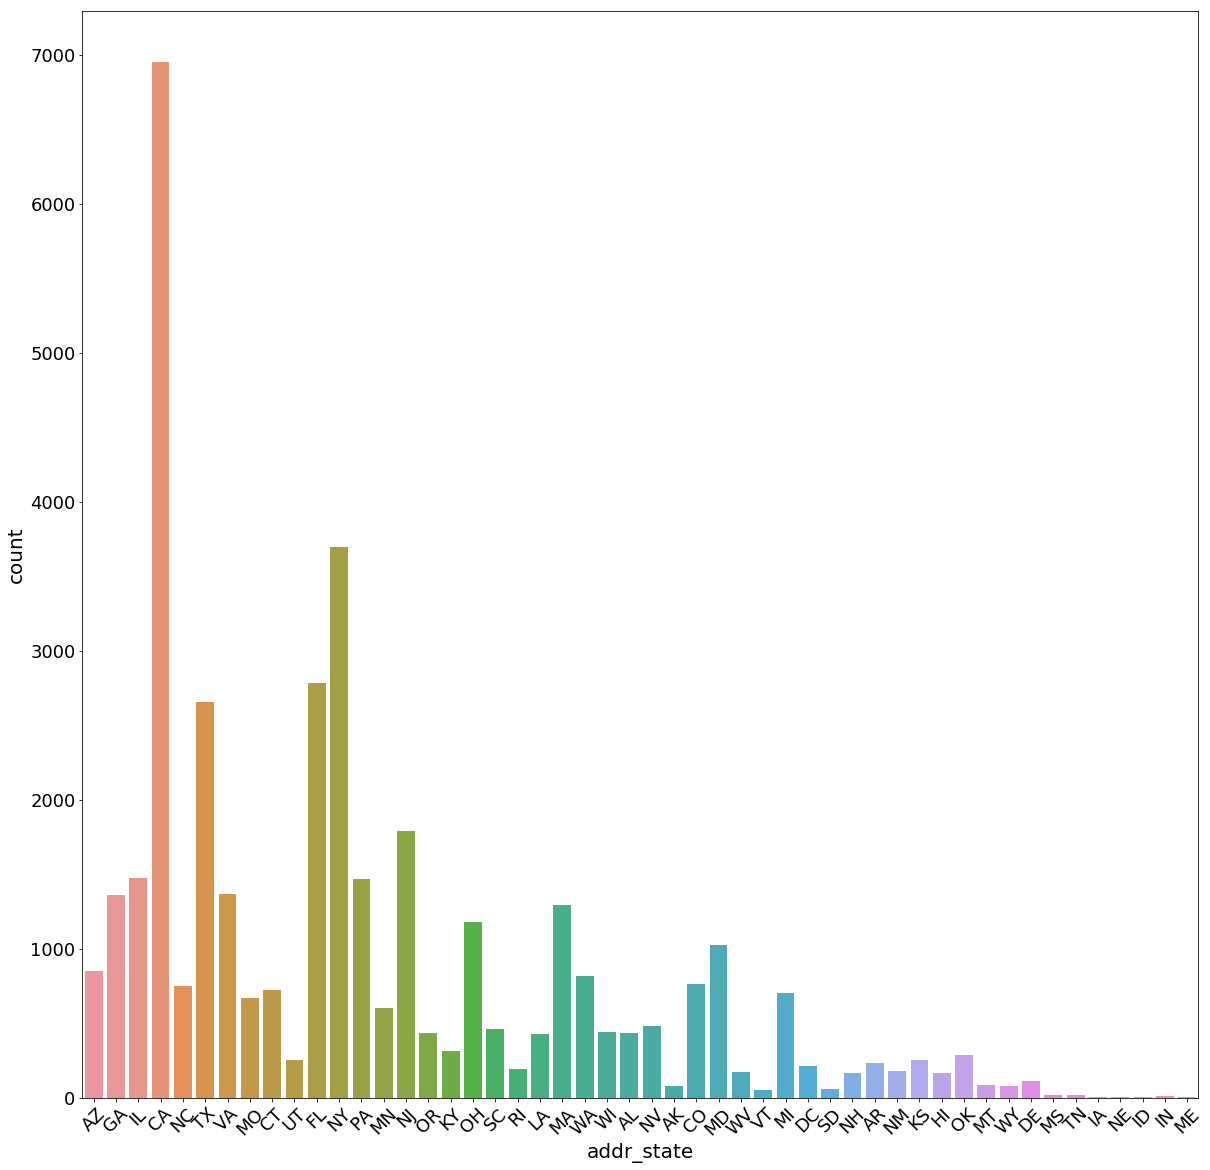

In [62]:
plt.figure(figsize=(20,20))
chart=sns.countplot(x='addr_state',data=lending_df_cleaned_final)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

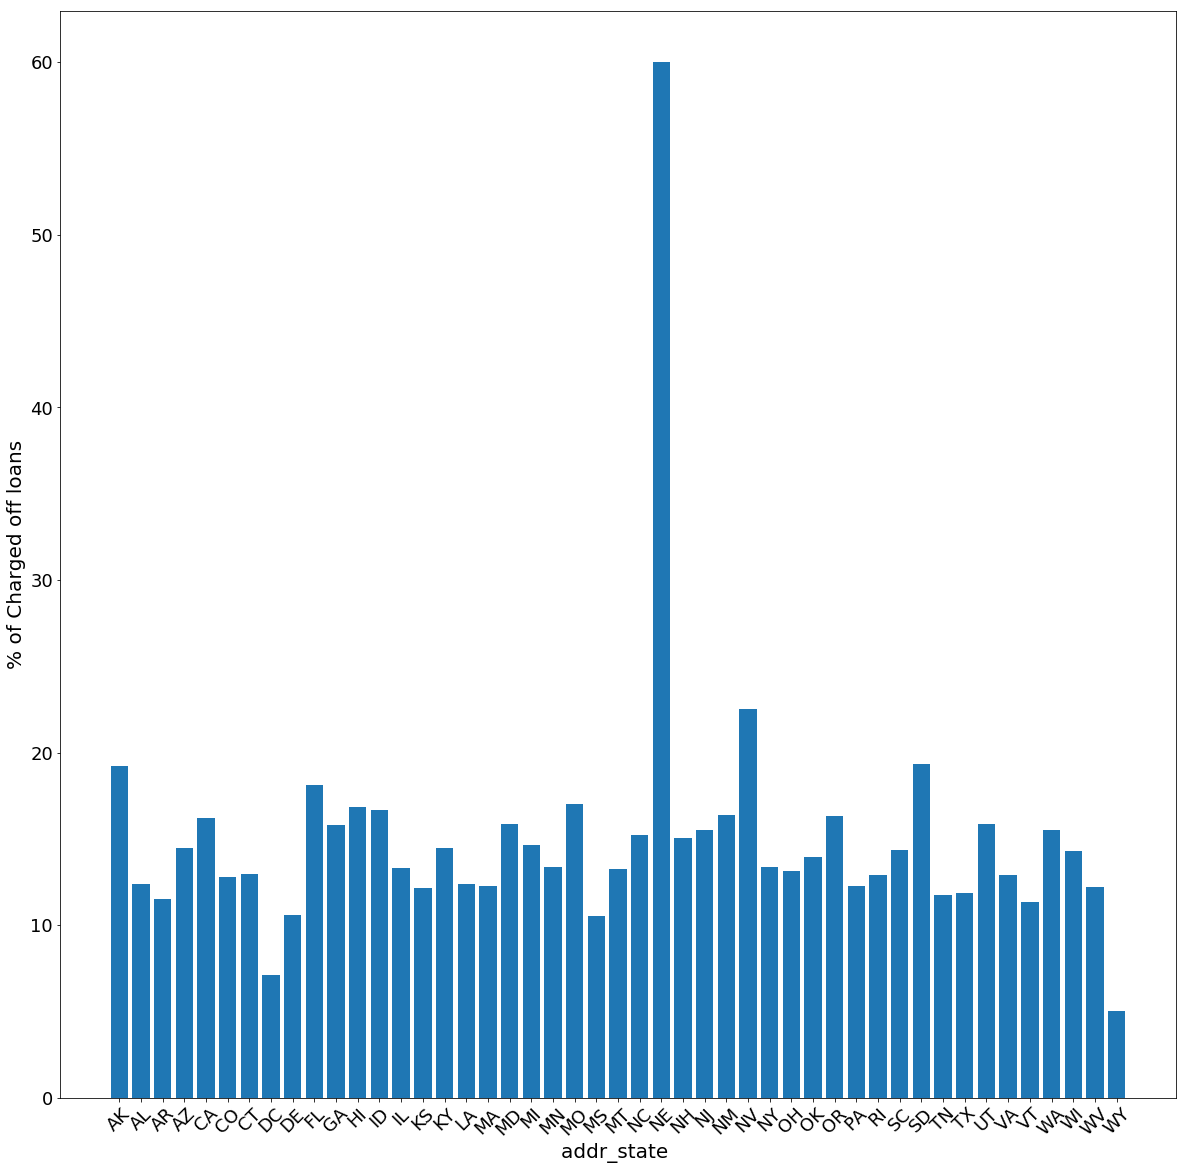

<Figure size 1440x1440 with 0 Axes>

In [63]:
lending_df_emp_state=lending_df_cleaned_final.groupby(['addr_state','loan_status']).count().reset_index()
#print(lending_df_emp_length.groupby('emp_length')['loan_amnt'].transform('sum'))
lending_df_emp_state['percent']=100*lending_df_emp_state['loan_amnt']/lending_df_emp_state.groupby('addr_state')['loan_amnt'].transform('sum')
lending_df_emp_state=lending_df_emp_state[lending_df_emp_state['loan_status']=='Charged Off']
fig, ax = plt.subplots(figsize=(20,20))

plt.figure(figsize=(20,20))

ax.bar(lending_df_emp_state['addr_state'],lending_df_emp_state['percent'])
ax.set_xlabel("addr_state ")
ax.set_ylabel("% of Charged off loans")

ax.tick_params(axis='x', labelrotation = 45)

**Observations** : 1) State CA (California) has the highest no of loans <br>
2)State NE has the highest no of defaulters but the noof loans in the state is very limited hence cannot be considered a variable that affects the analysis

**Variable : installment**
The installment of the loan

In [64]:
lending_df_cleaned_final.groupby('loan_status').installment.describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


               count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   5627.0  336.175006  217.051841  22.79  168.5550  293.87   
Fully Paid   32950.0  320.125232  207.081110  15.69  165.2825  275.65   

                 75%      max  
loan_status                    
Charged Off  457.840  1305.19  
Fully Paid   420.735  1295.21  


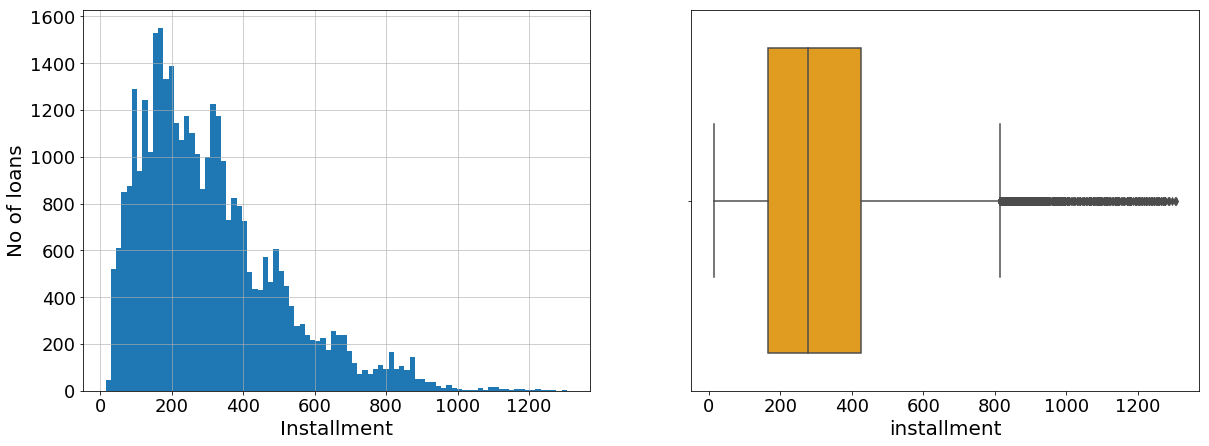

In [65]:
print(lending_df_cleaned_final.groupby('loan_status').installment.describe())

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(lending_df_cleaned__annual_inc.installment,bins='auto')
plt.xlabel('Installment')
plt.ylabel('No of loans')
plt.grid(axis='x',alpha=0.75)
plt.grid(axis='y',alpha=0.75)


plt.subplot(1,2,2)
sns.boxplot(x=lending_df_cleaned_final.installment, hue=lending_df_cleaned_final.loan_status,color='orange')

In [66]:
# We can see that that there are outliers just below 800 but we willconsider 800 for removing the outliers
lending_df_cleaned_installment= lending_df_cleaned_final[lending_df_cleaned_final.installment<=800]

In [67]:
lending_df_cleaned_installment.groupby('loan_status').installment.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5356.0,307.513684,178.763518,22.79,165.625,280.515,418.015,799.84
Fully Paid,31650.0,296.068645,171.587142,15.69,162.310,265.080,396.415,799.84


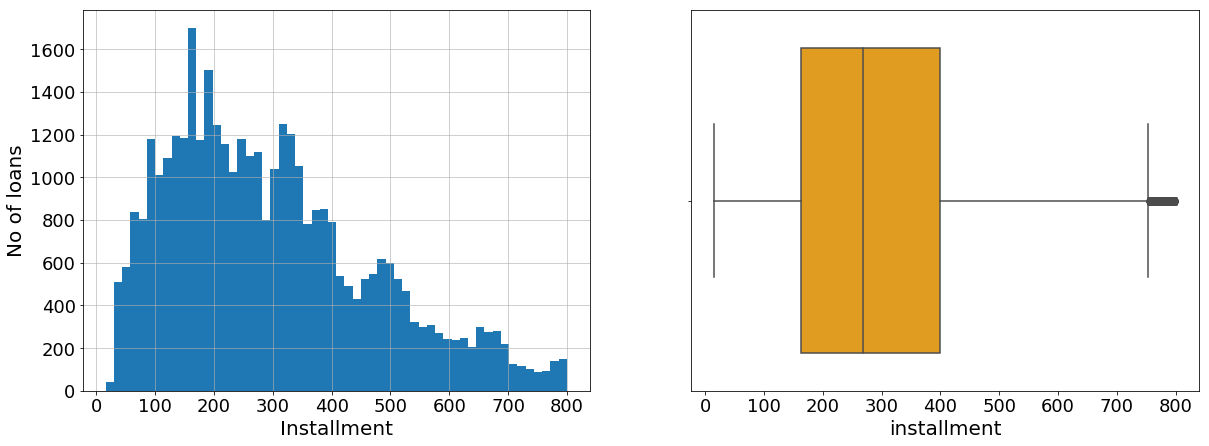

In [68]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(lending_df_cleaned_installment.installment,bins='auto')
plt.xlabel('Installment')
plt.ylabel('No of loans')
plt.grid(axis='x',alpha=0.75)
plt.grid(axis='y',alpha=0.75)


plt.subplot(1,2,2)
sns.boxplot(x=lending_df_cleaned_installment.installment,color='orange')

D:\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Percentage of Charged off loans')

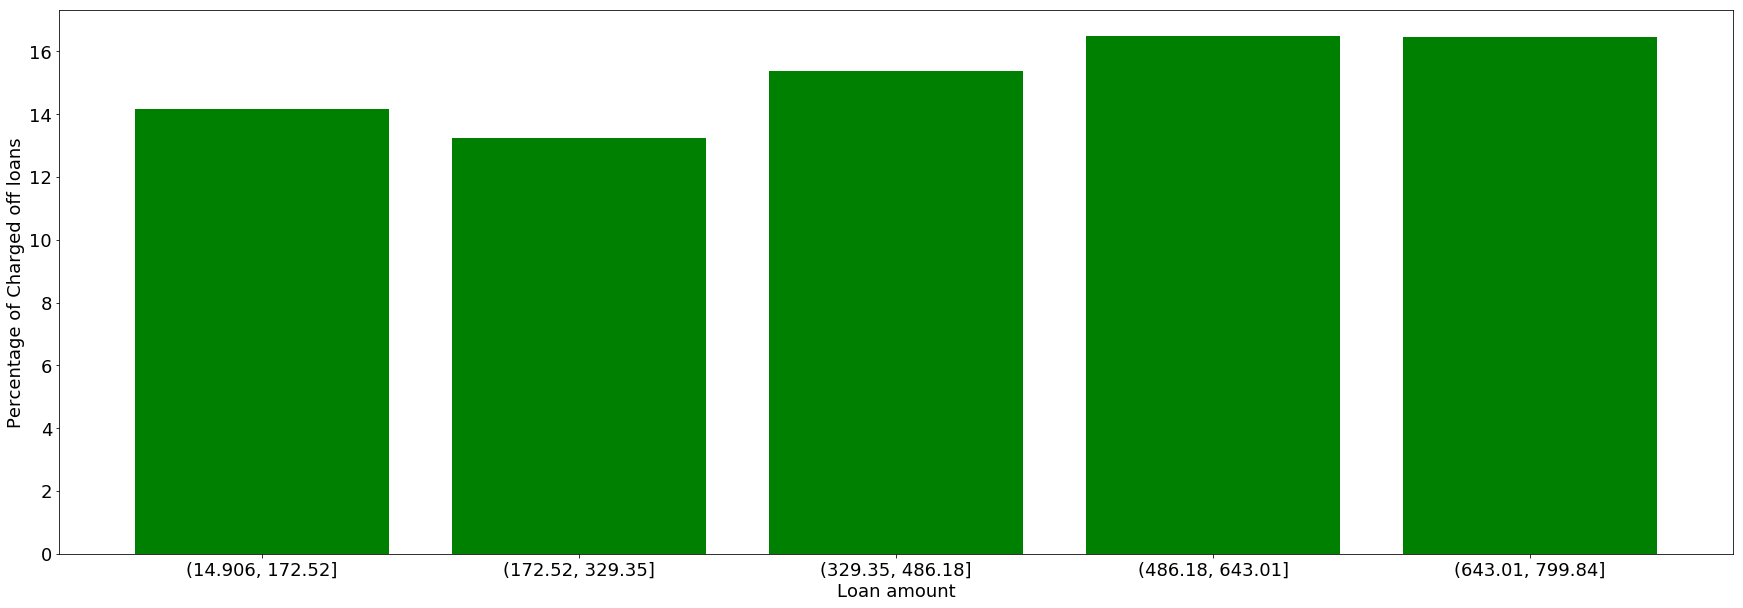

In [69]:
plt.figure(figsize=(30,10))
lending_df_cleaned_installment['installment_bins']=pd.cut(lending_df_cleaned_installment['installment'],bins=5)
lending_df_cleaned_installment_bins=lending_df_cleaned_installment.groupby(by=['installment_bins','loan_status']).count()
lending_df_cleaned_installment_bins['perc']=100*lending_df_cleaned_installment_bins['installment']/lending_df_cleaned_installment_bins.groupby('installment_bins')['installment'].transform('sum')
lending_df_cleaned_installment_bins=lending_df_cleaned_installment_bins.reset_index()
lending_df_cleaned_installment_bins['installment_bins']= lending_df_cleaned_installment_bins['installment_bins'].apply(lambda x : str(x))
lending_df_cleaned_installment_bins=lending_df_cleaned_installment_bins[lending_df_cleaned_installment_bins['loan_status']=='Charged Off']
plt.bar('installment_bins','perc',data=lending_df_cleaned_installment_bins, color="green")
plt.xlabel('Loan amount',fontsize=18)
plt.ylabel("Percentage of Charged off loans",fontsize=18)

**Observations** : There isn't asignificant change in percentag in charged off loans as compared to loam_amount
    2) Mean installment off charged off loans are greater than that of fully paid


**Variable - dti** <br>
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [70]:
lending_df_cleaned_final.groupby('loan_status').dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,14.000624,6.585577,0.0,9.05,14.29,19.29,29.85
Fully Paid,32950.0,13.148421,6.680041,0.0,7.98,13.20,18.39,29.99


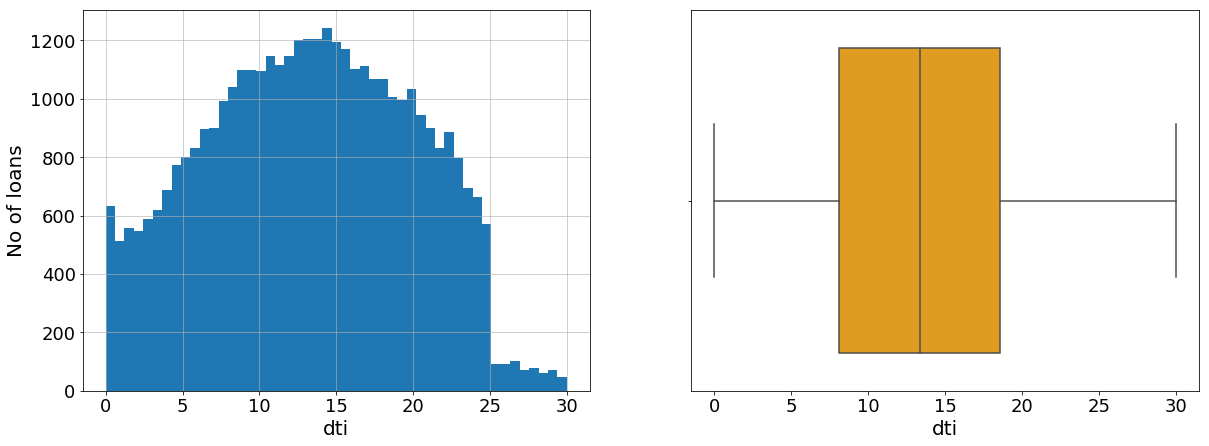

In [71]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(lending_df_cleaned_final.dti,bins='auto')
plt.xlabel('dti')
plt.ylabel('No of loans')
plt.grid(axis='x',alpha=0.75)
plt.grid(axis='y',alpha=0.75)


plt.subplot(1,2,2)
sns.boxplot(x=lending_df_cleaned_final.dti,color='orange')

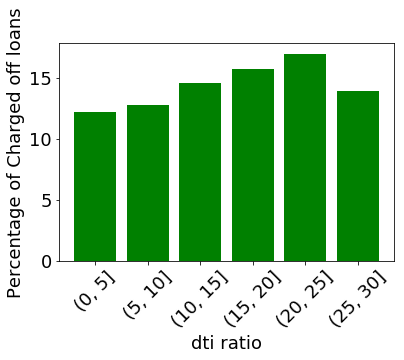

In [72]:
lending_df_cleaned_final['dti_bins']=pd.cut(lending_df_cleaned_final['dti'],bins=[0,5,10,15,20,25,30])
lending_df_cleaned_dti=lending_df_cleaned_final.groupby(by=['dti_bins','loan_status']).count()
lending_df_cleaned_dti['perc']=100*lending_df_cleaned_dti['dti']/lending_df_cleaned_dti.groupby('dti_bins')['installment'].transform('sum')
lending_df_cleaned_dti=lending_df_cleaned_dti.reset_index()
lending_df_cleaned_dti['dti_bins']= lending_df_cleaned_dti['dti_bins'].apply(lambda x : str(x))
lending_df_cleaned_dti=lending_df_cleaned_dti[lending_df_cleaned_dti['loan_status']=='Charged Off']
plt.bar('dti_bins','perc',data=lending_df_cleaned_dti, color="green")
plt.xlabel('dti ratio',fontsize=18)
plt.ylabel("Percentage of Charged off loans",fontsize=18)
plt.tick_params(axis='x', labelrotation = 45)

**Observations**: 1) The percentage of defaulters increase with increase in dti ratio though the percentage is bit less after 25 but seeing from the distribution the no of loan borrowers whose dti is more than 25 is very less. <br>
2) Mean dti of charged off loans is greater than of full paid. <br>
3) There is a signifcant decrease in no of loans after dti of 25.

# Bivariate analysis

**Variable to analyse** : annual_income vs loan_amnt

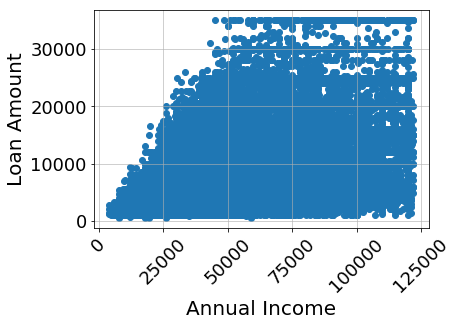

In [73]:
plt.scatter('annual_inc','loan_amnt',data=lending_df_cleaned__annual_inc)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.grid(axis='x',alpha=0.75)
plt.grid(axis='y',alpha=0.75)
plt.tick_params(axis='x', labelrotation = 45)

**Observation**

1)There are people with income of 50000 or less and  loan amount of 25000 or more . These will be risky loans as we have previously seen as higher loan amount increases the chances of defaulter and higher income reduces it. Hence people with leass income and higher loans are very risky

**Variable to analyse** : year vs No of loans charged off

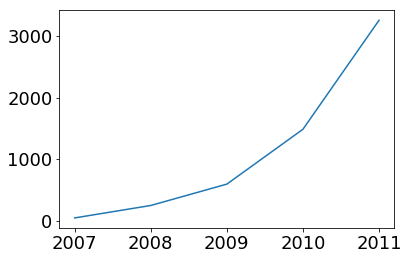

In [74]:
lending_df_cleaned_final_charged_off= lending_df_cleaned_final[lending_df_cleaned_final['loan_status']=='Charged Off'].groupby('issue_year').count().reset_index()
plt.plot(lending_df_cleaned_final_charged_off['issue_year'],lending_df_cleaned_final_charged_off['loan_amnt'])

**Observations** :  <br>
1)No of charged of loans were increasingly steadily from 2007 to 2009 and then increased dramatically after 2009. 


Let us also analyse  the no of loans over time. 

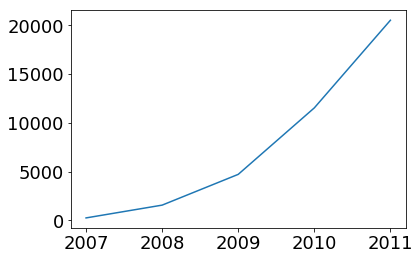

In [75]:
lending_df_cleaned_final_charged_off= lending_df_cleaned_final.groupby('issue_year').count().reset_index()
plt.plot(lending_df_cleaned_final_charged_off['issue_year'],lending_df_cleaned_final_charged_off['loan_amnt'])

**Observations** : Trend of No of loan over time is same of No of charged of loans over time

**loan_amnt vs verification_status vs loan status**

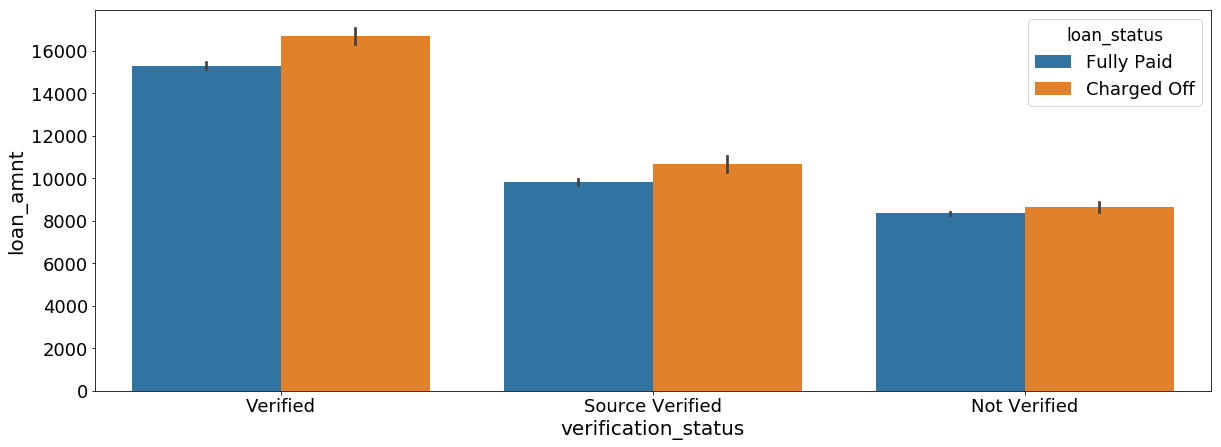

In [76]:
plt.figure(figsize=(20,7))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=lending_df_cleaned_final, estimator=np.mean)

**Observation** : <br>
1) Greater the loan amount greater the chance loan being verified <br>
2) We already know that larger loans are less in number, but see a higher charge off rate. <br>
3) This it explains why verfied loans see a higher rate of default. It's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. <br>

**Interest Rate and Term** :<br>

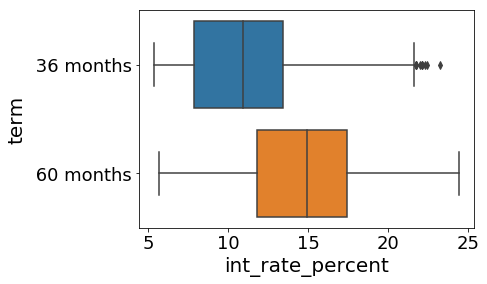

In [77]:
sns.boxplot(x='int_rate_percent', y='term', data=lending_df_cleaned_final)
plt.show()

**Observation:**

This shows that interest rates are higher for higher term of loan

In [78]:
corr=lending_df_cleaned_final.corr()

### Correlation matrix heat map

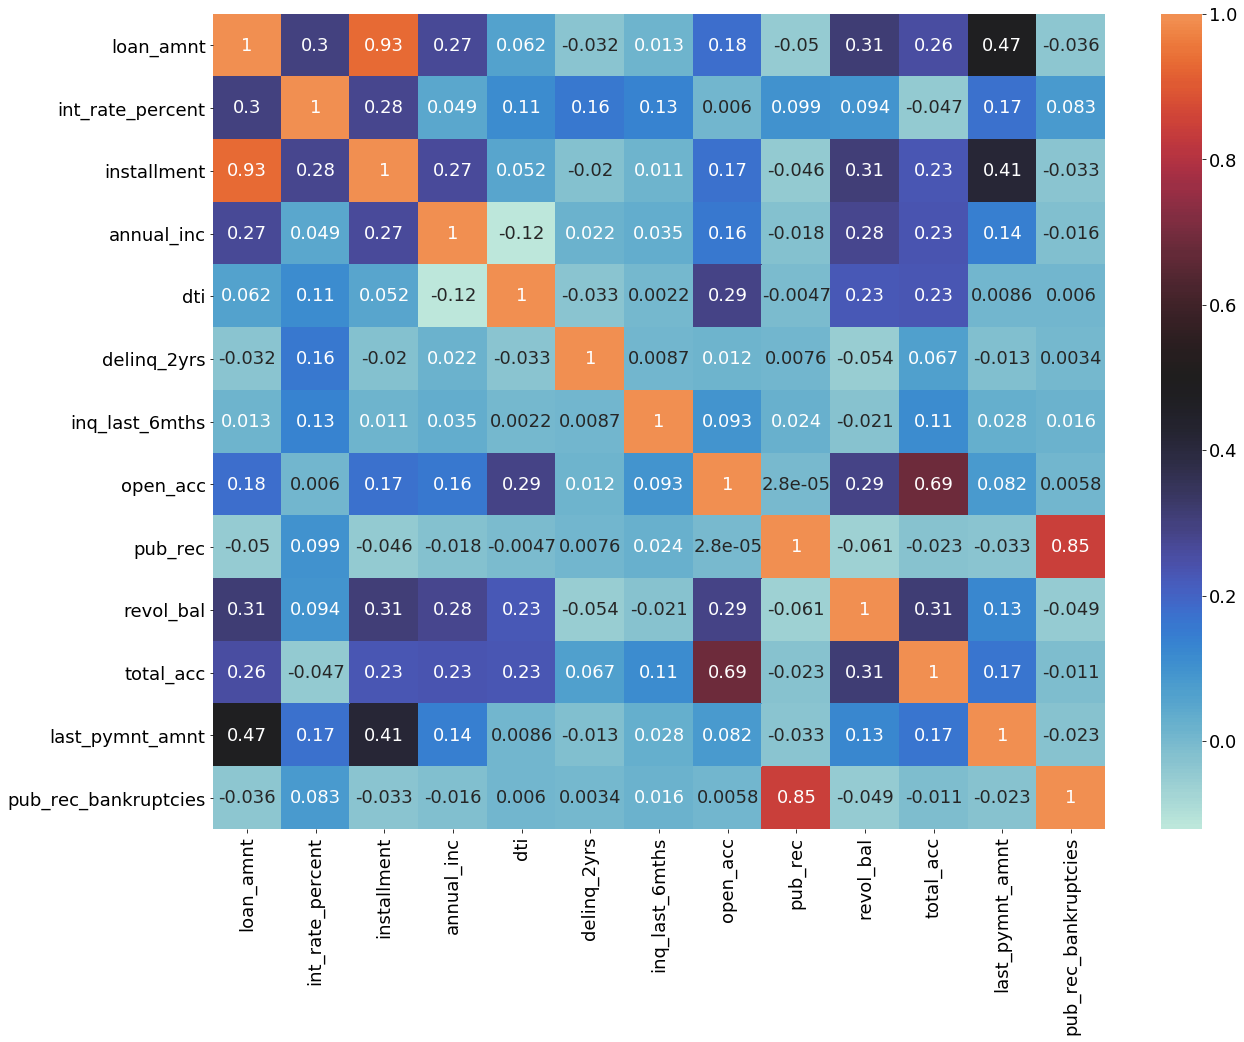

In [79]:
plt.figure(figsize=(20,15))
cont_var= ['loan_amnt', 'int_rate_percent', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = lending_df_cleaned_final[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation**:

1) loan_amnt is correlated to last_payment_amount with r factor.44, as expected <br>
2) int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan. <br>
3) loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.